In [218]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

**load the dataset from assignment1**

In [219]:
# define the name of headers
col_name = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
# read data from csv file
persons = pd.read_csv('dataset1_processed.csv',header=None,names = col_name)

In [220]:
persons.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**convert categorical columns into multiple binary or numerical columns**

**The values of education feature is ordinal, so convert them into numerical values**

In [221]:
#refer to https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
edu = pd.Categorical(persons['education'],categories=['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Some-college','Bachelors','Masters','Doctorate'],ordered=True)
labels, unique = pd.factorize(edu, sort=True)
persons['education'] = labels

In [222]:
persons['education'].value_counts()

8     9457
12    6400
13    4859
14    1559
11    1257
6      996
10     962
5      794
3      531
9      517
4      440
15     364
7      361
2      276
1      141
0       44
Name: education, dtype: int64

**The other categorial features('workclass','marital-status','occupation','relationship','race','sex','native-country') are nominal,using get_dummies to convert them into multiple binary values. **

In [223]:
#get all the data columns except target value 'salary' for get_dummies process
data = persons.loc[:, persons.columns != 'salary']

In [224]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,8,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [225]:
# use get_dummies method to convert other categorial features to binary values
# refer to https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
data_dummies = pd.get_dummies(data, prefix_sep='_', drop_first=True)

In [226]:
data_dummies.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,8,9,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,6,7,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,13,0,0,40,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Normalize the numeric features**

In [227]:
# retrive all the numerical columns
data_numerical = data_dummies[['age','fnlwgt','education','education-num','capital-gain','capital-loss','hours-per-week']]


In [228]:
data_normalize = data_dummies
# normalize every numerical columns in for loop using normalize() method
for col in data_numerical.columns:
    x = np.array(data_numerical[col])
    y = normalize([x]) 
    data_normalize[col] = y[0].tolist()   
   

In [229]:
data_normalize.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.005661,0.002098,0.007369,0.007318,0.001687,0.0,0.005510,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.007258,0.002255,0.007369,0.007318,0.000000,0.0,0.001791,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.005516,0.005836,0.004535,0.005066,0.000000,0.0,0.005510,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.007694,0.006352,0.003401,0.003940,0.000000,0.0,0.005510,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.004065,0.009158,0.007369,0.007318,0.000000,0.0,0.005510,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Split the data into 2 parts: train and validation**

In [232]:
X = data_normalize
y = persons['salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
accuracy = pd.DataFrame(columns=['train_accuracy','train_average_class_accuracy','test_accuracy','test_average_class_accuracy'])


**Train at least 3 different machine learning classification algorithms and evaluate their accuracy**

In [233]:
# def a method to calculate the average class accuracy
def average_class_accuracy (actual, predict):
    cm = confusion_matrix(actual, predict, labels=['<=50K','>50K'])
    tp = cm[0][0]
    tn = cm[1][1]
    less50class = np.sum(cm[0])
    greater50class = np.sum(cm[1])
    less50class_accuracy = tp/less50class
    greater50class_accuracy = tn/greater50class
    average_class_accuracy = (less50class_accuracy+greater50class_accuracy)/2
    return average_class_accuracy

In [234]:
#DecisionTreeClassfier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
#accuracy on train data 
train_pre = dtc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pre)
train_average_class_accuracy = average_class_accuracy(y_train, train_pre)
#accuracy on test data
predictions = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, predictions)
test_average_class_accuracy = average_class_accuracy(y_test, predictions)
accuracy.loc['DecisionTreeClassfier'] = [train_accuracy,train_average_class_accuracy,dtc_accuracy,test_average_class_accuracy]
accuracy.loc['DecisionTreeClassfier'] 

train_accuracy                  0.999951
train_average_class_accuracy    0.999901
test_accuracy                   0.816874
test_average_class_accuracy     0.756628
Name: DecisionTreeClassfier, dtype: float64

In [235]:
#KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
#accuracy on train data 
train_pre = knc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pre)
train_average_class_accuracy = average_class_accuracy(y_train, train_pre)
#accuracy on test data
predictions = knc.predict(X_test)
knc_accuracy = accuracy_score(y_test, predictions)
test_average_class_accuracy = average_class_accuracy(y_test, predictions)
accuracy.loc['KNeighborsClassifier'] = [train_accuracy,train_average_class_accuracy,knc_accuracy,test_average_class_accuracy]
accuracy.loc['KNeighborsClassifier']

train_accuracy                  0.875728
train_average_class_accuracy    0.814551
test_accuracy                   0.825737
test_average_class_accuracy     0.741632
Name: KNeighborsClassifier, dtype: float64

In [236]:
#GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
#accuracy on train data 
train_pre = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pre)
train_average_class_accuracy = average_class_accuracy(y_train, train_pre)
#accuracy on test data
predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, predictions)
test_average_class_accuracy = average_class_accuracy(y_test, predictions)
accuracy.loc['GaussianNB'] = [train_accuracy,train_average_class_accuracy,gnb_accuracy,test_average_class_accuracy]
accuracy.loc['GaussianNB']

train_accuracy                  0.553675
train_average_class_accuracy    0.688022
test_accuracy                   0.550299
test_average_class_accuracy     0.682287
Name: GaussianNB, dtype: float64

In [237]:
#MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)
#accuracy on train data 
train_pre = mlpc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pre)
train_average_class_accuracy = average_class_accuracy(y_train, train_pre)
#accuracy on test data
predictions = mlpc.predict(X_test)
mlpc_accuracy = accuracy_score(y_test, predictions)
test_average_class_accuracy = average_class_accuracy(y_test, predictions)
accuracy.loc['MLPClassifier'] = [train_accuracy,train_average_class_accuracy,mlpc_accuracy,test_average_class_accuracy]
accuracy.loc['MLPClassifier']

train_accuracy                  0.861470
train_average_class_accuracy    0.811787
test_accuracy                   0.840585
test_average_class_accuracy     0.775349
Name: MLPClassifier, dtype: float64

In [238]:
#SVC
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)
#accuracy on train data 
train_pre = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pre)
train_average_class_accuracy = average_class_accuracy(y_train, train_pre)
#accuracy on test data
svc_accuracy = accuracy_score(y_test, predictions)
test_average_class_accuracy = average_class_accuracy(y_test, predictions)
accuracy.loc['SVC'] = [train_accuracy,train_average_class_accuracy,svc_accuracy,test_average_class_accuracy]
accuracy.loc['SVC']

train_accuracy                  0.812679
train_average_class_accuracy    0.736156
test_accuracy                   0.813191
test_average_class_accuracy     0.730497
Name: SVC, dtype: float64

**Report the accuracy and the average class accuracy on training and validation sets.**

In [239]:
accuracy.sort_values(by=['test_accuracy'], inplace=True, ascending=False)
print(accuracy)

                       train_accuracy  train_average_class_accuracy  \
MLPClassifier                0.861470                      0.811787   
KNeighborsClassifier         0.875728                      0.814551   
DecisionTreeClassfier        0.999951                      0.999901   
SVC                          0.812679                      0.736156   
GaussianNB                   0.553675                      0.688022   

                       test_accuracy  test_average_class_accuracy  
MLPClassifier               0.840585                     0.775349  
KNeighborsClassifier        0.825737                     0.741632  
DecisionTreeClassfier       0.816874                     0.756628  
SVC                         0.813191                     0.730497  
GaussianNB                  0.550299                     0.682287  


**Plot one bar graph to compare these results for each algorithm. Discuss the results.**

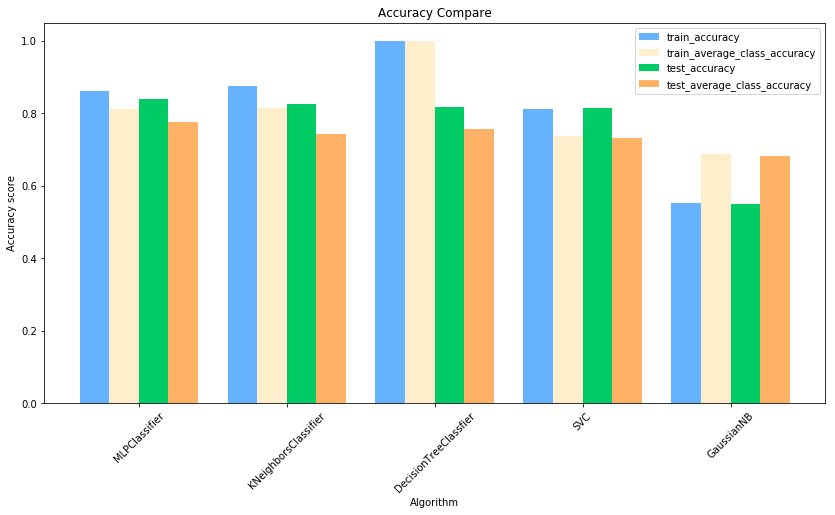

In [240]:
#refer to https://matplotlib.org/3.1.0/gallery/units/bar_unit_demo.html
#refer to https://stackoverflow.com/questions/53342170/matplotlib-plot-multiple-bars-in-one-graph
% matplotlib inline
fig, axes = plt.subplots(figsize=(14,7))
ind = np.arange(len(accuracy)) 
# the width of the bars
width = 0.2         
p1 = axes.bar(ind, accuracy['train_accuracy'], data=accuracy,width=0.2,color='#66B2FF')
p2 = axes.bar(ind+width, accuracy['train_average_class_accuracy'], data=accuracy,width=0.2,color='#FFEECC')
p3 = axes.bar(ind+(width*2), accuracy['test_accuracy'], data=accuracy,width=0.2,color='#00CC66')
p4 = axes.bar(ind+(width*3), accuracy['test_average_class_accuracy'], data=accuracy,width=0.2,color='#FFB266')
axes.set_xticklabels(accuracy.index)
axes.set_xticks(ind + width + width/2)
axes.set_ylabel('Accuracy score')
axes.set_xlabel('Algorithm')
axes.set_title('Accuracy Compare')
axes.xaxis.set_tick_params(rotation=45)
axes.legend((p1[0], p2[0],p3[0],p4[0]), ('train_accuracy', 'train_average_class_accuracy','test_accuracy','test_average_class_accuracy'))


**Result Disscussion**:
The MLPClassifier algorithm acheived the highest accuracy on test data.
But the DecisionTreeClassifier algorithm worked best at the prediction on the train data for both accuracy and average class accuracy. Also, it worked best for the average class accuracy on the test data.
And, GussianNB algorithm worked worst on this dataset for both train data and test data.

**Choose one of the ML algorithms and plot one line chart to show how the variation of one parameter of the selected ML algorithm affects the average class accuracy on the validation set (accuracy vs parameter). **

In [241]:
#choose KNeighborsClassifier algorithm and its n_neighbors parameter
k = [3,5,10,15,20,25,50,100]
acc_vs_p =[]
for i in k:
    knca = KNeighborsClassifier(n_neighbors=i)
    knca.fit(X_train,y_train)
    predictions = knca.predict(X_test)
    acc_vs_p.append(average_class_accuracy(y_test, predictions))

Text(0.5, 1.0, 'Accuracy vs the n_neighbors parameter of KNeighborsClassifier')

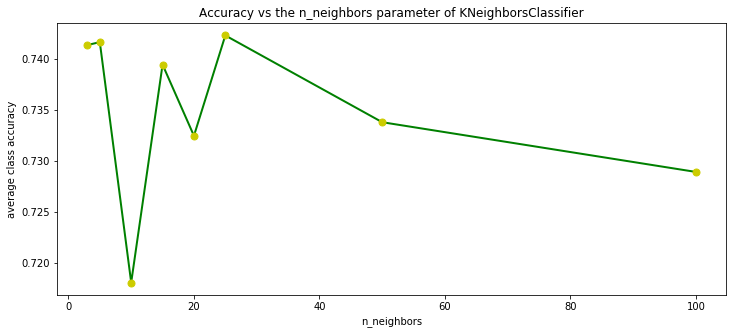

In [242]:
fig = plt.figure(figsize=(12,5))
plt.plot(k,acc_vs_p,'go-', linewidth=2, markersize=7,markerfacecolor='#CCCC00',markeredgecolor='#CCCC00')
plt.xlabel('n_neighbors')
plt.ylabel('average class accuracy')
plt.title('Accuracy vs the n_neighbors parameter of KNeighborsClassifier')

**From the algorithms you tested, select the one you believe is the best for this task, justify and try to achieve the best performance possible over your validation set. Report your best result (average class accuracy). Explain any decisions you consider relevant during the training of your ML model. You may try to do changes to your pre-processing (including the imputation of the first assignment or columns transformations performed here) and/or tune the hyper parameters of your model. Describe the steps you have taken to find the configuration that yields the best result.**


The numbers of samples with salary '>50K' is much smaller than the samples with salary '<=50K', so the accuracy of predicting the data with salary '>50K' is very low. Adding more samples with salary '>50K' can increase the accuracy of predicting these data.<br/>

The steps:<br/>
1. check the numbers of different values of salary column,the number of samples with salary '<=50K' 
   is 21764, with salary '>50K' is only 7194<br/>
2. compare the accuraies of predicting these two different values. The accuracy of predicting the 
   sample with '<=50K' is 0.97, the other with '>50K' is 0.265. <br/>
3. add the same samples with '>50K' to the whole dataset to make the balance of two different values.<br/>
4. run the algorithm to compare the accuracy with the previous dataset<br/>
5. the average class accuracy improves from 0.62 to 0.79<br/>


In [243]:
persons['salary'].value_counts()

<=50K    21764
>50K      7194
Name: salary, dtype: int64

In [244]:
MLPC = MLPClassifier()
MLPC.fit(X_train,y_train)
prediction = MLPC.predict(X_test)
cm = confusion_matrix(y_test, prediction, labels=['<=50K','>50K'])
tp = cm[0][0]
tn = cm[1][1]
less50class = np.sum(cm[0])
greater50class = np.sum(cm[1])
less50class_accuracy = tp/less50class
greater50class_accuracy = tn/greater50class
average_class_accuracy = (less50class_accuracy+greater50class_accuracy)/2
print('less50class_accuracy: ',less50class_accuracy)
print('greater50class_accuracy: ',greater50class_accuracy)
print('average_class_accuracy: ',average_class_accuracy)

less50class_accuracy:  0.9263061130687912
greater50class_accuracy:  0.5812124016658954
average_class_accuracy:  0.7537592573673433


C:\Users\lanch\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [245]:
#adding more samples with salary '>50K' to the dataset
data_complete = data_normalize
data_complete['salary'] = persons['salary']
data_complete.head()
data_greater50K = data_complete[data_complete['salary'] == '>50K']
data1 = data_complete.append(data_greater50K)
data_new = data1.append(data_greater50K)
data_new['salary'].value_counts()

<=50K    21764
>50K     21582
Name: salary, dtype: int64

In [246]:
X = data_new.loc[:, data_new.columns != 'salary']
y = data_new['salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [247]:
# calculate the accuracy of the model prediction after renew the dataset 
MLPC = MLPClassifier()
MLPC.fit(X_train,y_train)
prediction = MLPC.predict(X_test)
cm = confusion_matrix(y_test, prediction, labels=['<=50K','>50K'])
tp = cm[0][0]
tn = cm[1][1]
less50class = np.sum(cm[0])
greater50class = np.sum(cm[1])
less50class_accuracy = tp/less50class
greater50class_accuracy = tn/greater50class
average_class_accuracy = (less50class_accuracy+greater50class_accuracy)/2
print('less50class_accuracy: ',less50class_accuracy)
print('greater50class_accuracy: ',greater50class_accuracy)
print('average_class_accuracy: ',average_class_accuracy)



less50class_accuracy:  0.8093415007656968
greater50class_accuracy:  0.8456904541241891
average_class_accuracy:  0.827515977444943


**Using your best model, predict the classes for the profiles provided in the test file dataset1_test.csv and generate an output file (submit as ​B00XXXXXX ​ _prediction.csv​) containing only the predicted class for each row. One entry class per line, e.g., **

In [268]:
# define the name of headers
col_name = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
# read the test data from csv file
test_data = pd.read_csv('dataset1_test.csv',header=None,names = col_name)
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [270]:
#convert categorical columns into multiple binary or numerical columns
edu = pd.Categorical(test_data['education'],categories=['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Some-college','Bachelors','Masters','Doctorate'],ordered=True)
labels, unique = pd.factorize(edu, sort=True)
test_data['education'] = labels

In [271]:
data_dummies = pd.get_dummies(test_data, prefix_sep='_', drop_first=True)

In [272]:
data_dummies.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,6,7,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,8,9,0,0,50,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,10,12,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,12,10,7688,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,198693,5,6,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [273]:
# retrive all the numerical columns
data_numerical = data_dummies[['age','fnlwgt','education','education-num','capital-gain','capital-loss','hours-per-week']]
data_normalize = data_dummies
# normalize every numerical columns in for loop using normalize() method
for col in data_numerical.columns:
    x = np.array(data_numerical[col])
    y = normalize([x]) 
    data_normalize[col] = y[0].tolist()   

In [274]:
data_normalize.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.004967,0.008515,0.004722,0.005468,0.000000,0.0,0.007635,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.007550,0.003372,0.006296,0.007031,0.000000,0.0,0.009544,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.005563,0.012650,0.007870,0.009374,0.000000,0.0,0.007635,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.008742,0.006019,0.009444,0.007812,0.008048,0.0,0.007635,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.006755,0.007460,0.003935,0.004687,0.000000,0.0,0.005726,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [275]:
# there is one column missing in the normolized test dataset comparing to the training data
# need to find out the column and add it to the test dataset
c1=data_normalize.columns
c2=X.columns
not_test_col = c2.difference(c1)
not_test_col

Index(['native-country_Holand-Netherlands'], dtype='object')

In [276]:
# test data missing one column 'native-country_Holand-Netherlands', add it back
data_normalize['native-country_Holand-Netherlands'] = 0

In [278]:
#use the best model to predict the value
prediction = MLPC.predict(data_normalize)

In [280]:
# change the result array to dataframe in order to save to the file 'B00809814_prediction.csv'
predict_data = pd.DataFrame(prediction)

In [282]:
predict_data.to_csv('B00809814_prediction.csv',index=False,header=False)